## Downstream analysis E18 habenula neurons

___Author___ Lieke L van de Haar

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/Users/liekevandehaar/opt/anaconda3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.6 anndata==0.7.4 umap==0.3.10 numpy==1.19.2 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.0 louvain==0.6.1


In [2]:
sc.settings.set_figure_params(dpi=80)

## Load Data 

In [3]:
adata = sc.read('./data/output/April2020_E18Hb-WT_quality_filtered_clustered_velo.h5ad')

## Finding marker genes

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


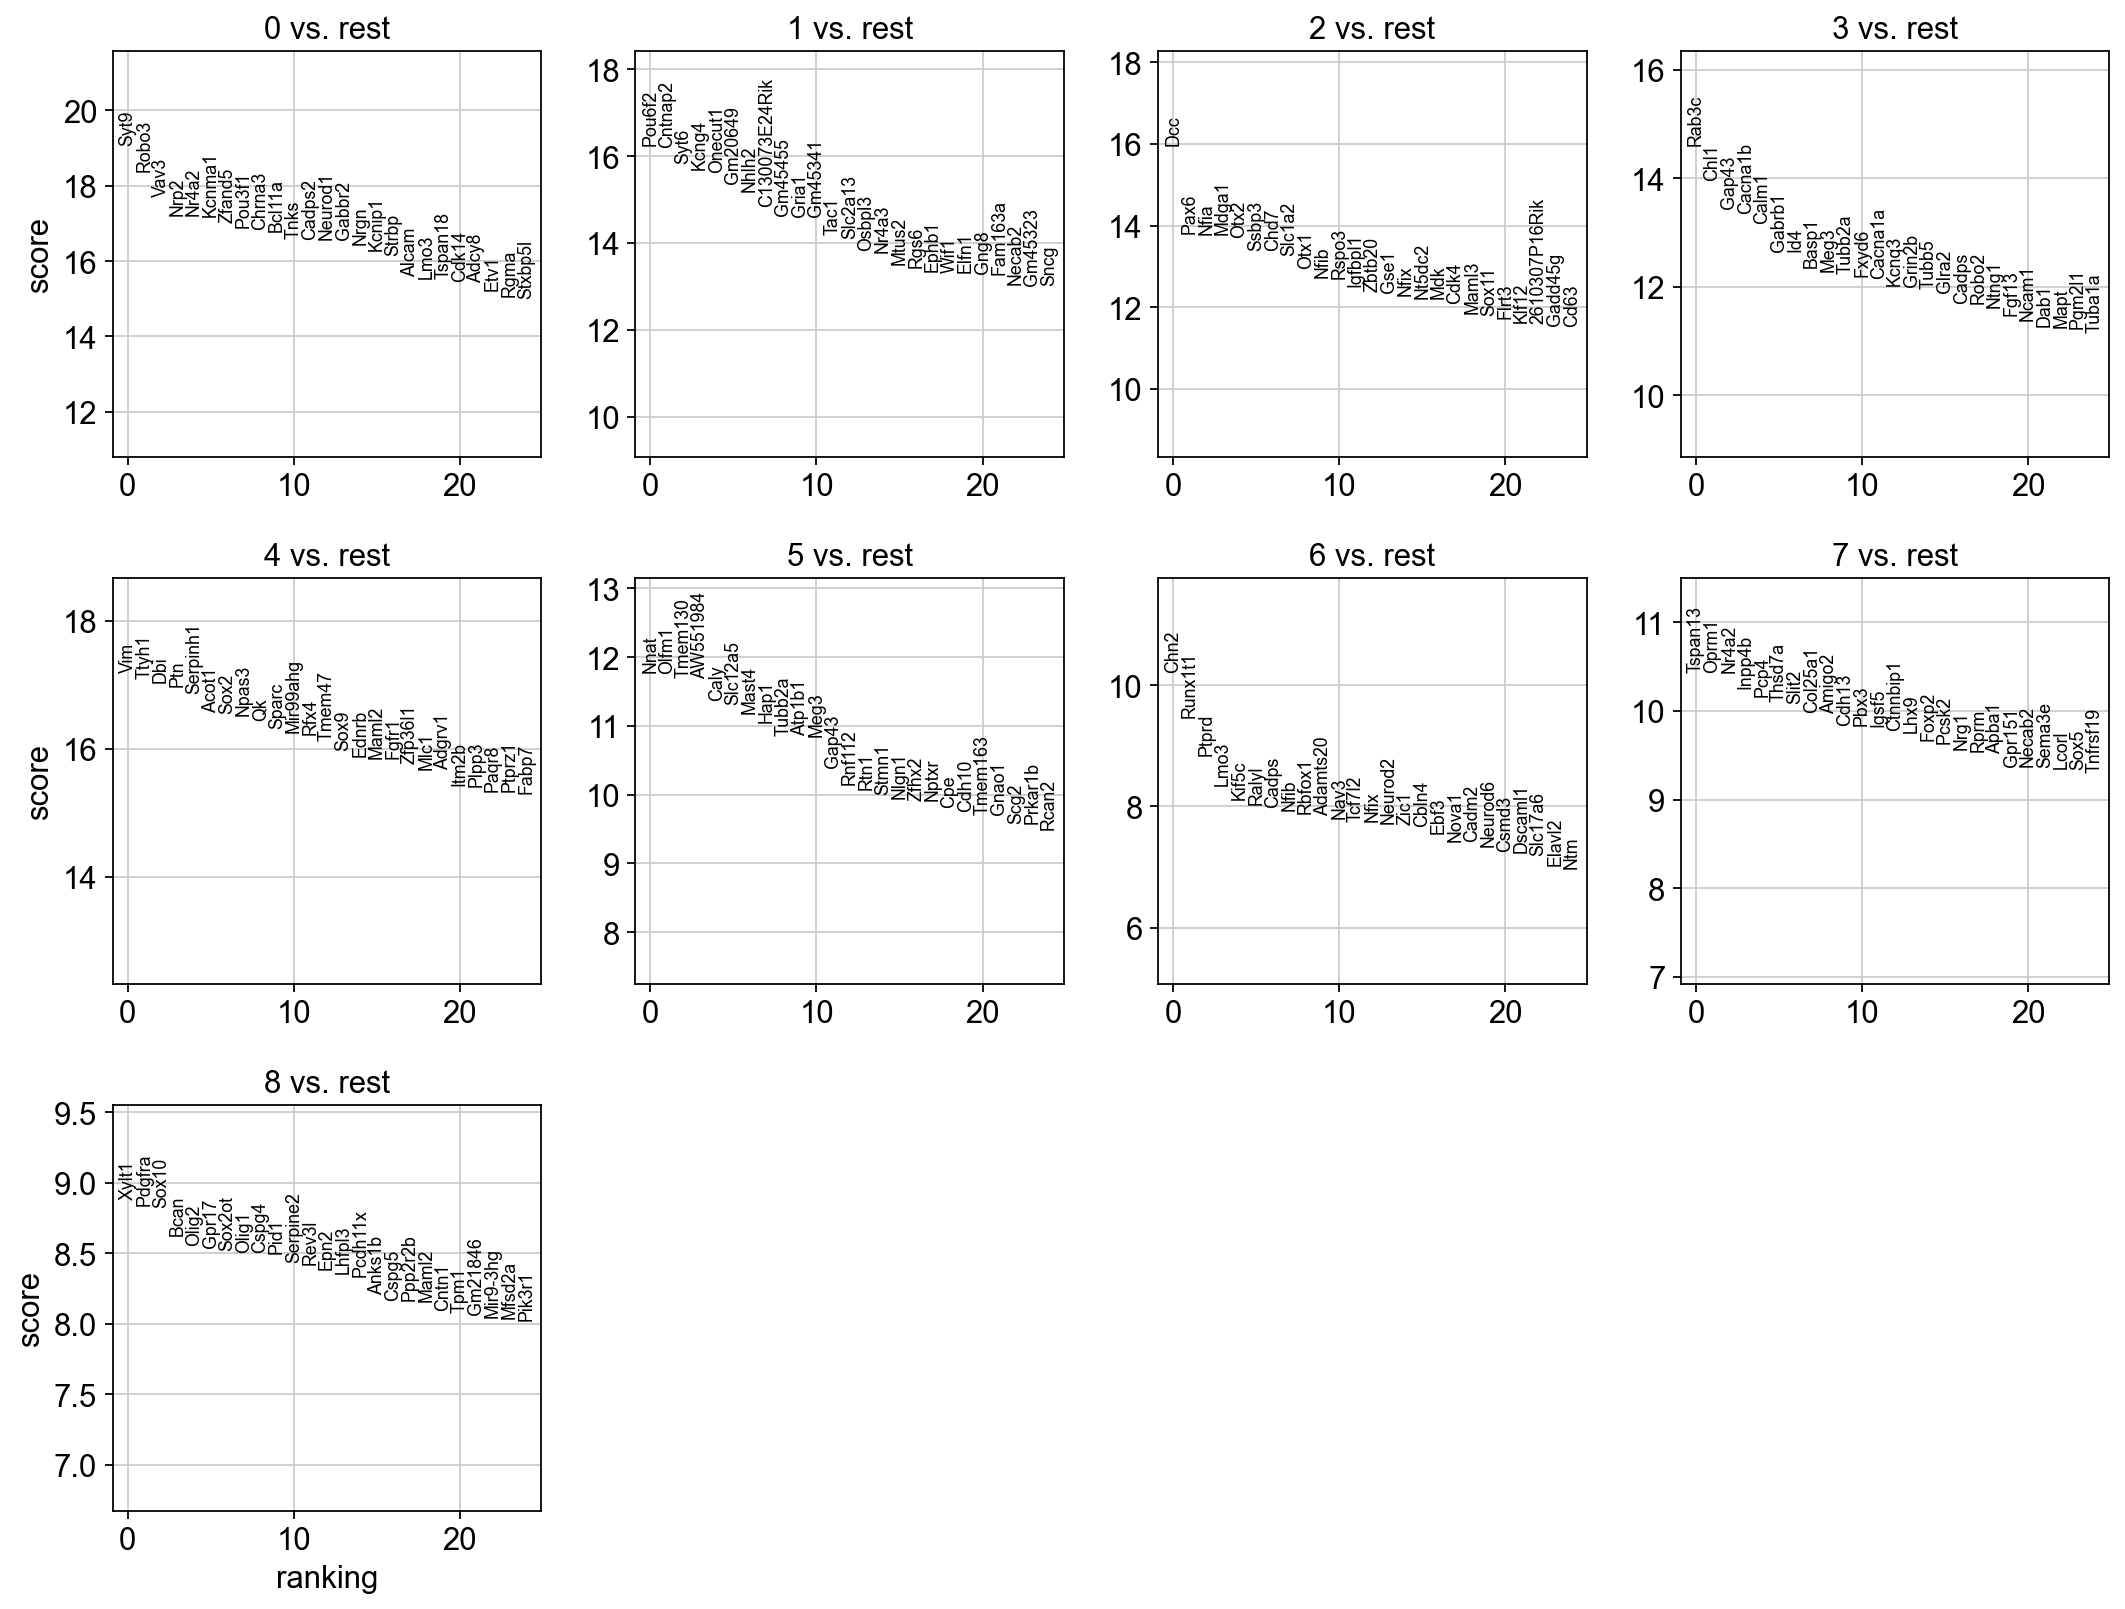

In [11]:
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [65]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0        1      2        3         4         5        6        7  \
0   Syt9   Pou6f2    Dcc    Rab3c       Vim      Nnat     Chn2  Tspan13   
1  Robo3  Cntnap2   Pax6     Chl1     Ttyh1     Olfm1  Runx1t1    Oprm1   
2   Vav3     Syt6   Nfia    Gap43       Dbi   Tmem130    Ptprd    Nr4a2   
3   Nrp2    Kcng4  Mdga1  Cacna1b       Ptn  AW551984     Lmo3   Inpp4b   
4  Nr4a2  Onecut1   Otx2    Calm1  Serpinh1      Caly    Kif5c     Pcp4   

        8  
0   Xylt1  
1  Pdgfra  
2   Sox10  
3    Bcan  
4   Olig2

In [52]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).to_csv(
     './data/output/April2020_E18Hb-WT_rank_genes.csv')

Get a table with the scores and groups.

In [6]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n           0_p      1_n           1_p    2_n           2_p      3_n  \
0   Syt9  3.440531e-81   Pou6f2  1.917310e-59    Dcc  1.886530e-57    Rab3c   
1  Robo3  1.429556e-75  Cntnap2  3.862711e-59   Pax6  2.164490e-43     Chl1   
2   Vav3  2.854535e-70     Syt6  1.333912e-56   Nfia  2.394136e-43    Gap43   
3   Nrp2  1.462790e-66    Kcng4  1.520253e-55  Mdga1  2.585234e-43  Cacna1b   
4  Nr4a2  2.138173e-66  Onecut1  4.258223e-55   Otx2  8.111578e-43    Calm1   

            3_p       4_n           4_p       5_n           5_p      6_n  \
0  2.152354e-48       Vim  2.592961e-66      Nnat  4.660523e-32     Chn2   
1  2.439475e-44     Ttyh1  1.320131e-65     Olfm1  5.482306e-32  Runx1t1   
2  2.980046e-41       Dbi  4.148017e-65   Tmem130  1.182688e-31    Ptprd   
3  1.098027e-40       Ptn  1.163572e-64  AW551984  1.406315e-31     Lmo3   
4  1.165396e-39  Serpinh1  6.908306e-64      Caly  5.458925e-30    Kif5c   

            6_p      7_n           7_p     8_n           8_p  
0  1.604814e-24  Tspan13  1.594385e-25   Xylt1  6.333674e-19  
1  2.537693e-21    Oprm1  1.613869e-25  Pdgfra  9.407376e-19  
2  8.763631e-19    Nr4a2  1.623700e-25   Sox10  1.087293e-18  
3  6.712212e-17   Inpp4b  1.107973e-24    Bcan  6.184014e-18  
4  4.318543e-16     Pcp4  2.799569e-24   Olig2  1.181739e-17

In [95]:
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).to_csv(
     './data/output/April2020_E18Hb-WT_rank_genes_groups_scores.csv')

Compare to a single cluster. 

ranking genes
    finished (0:00:05.02) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


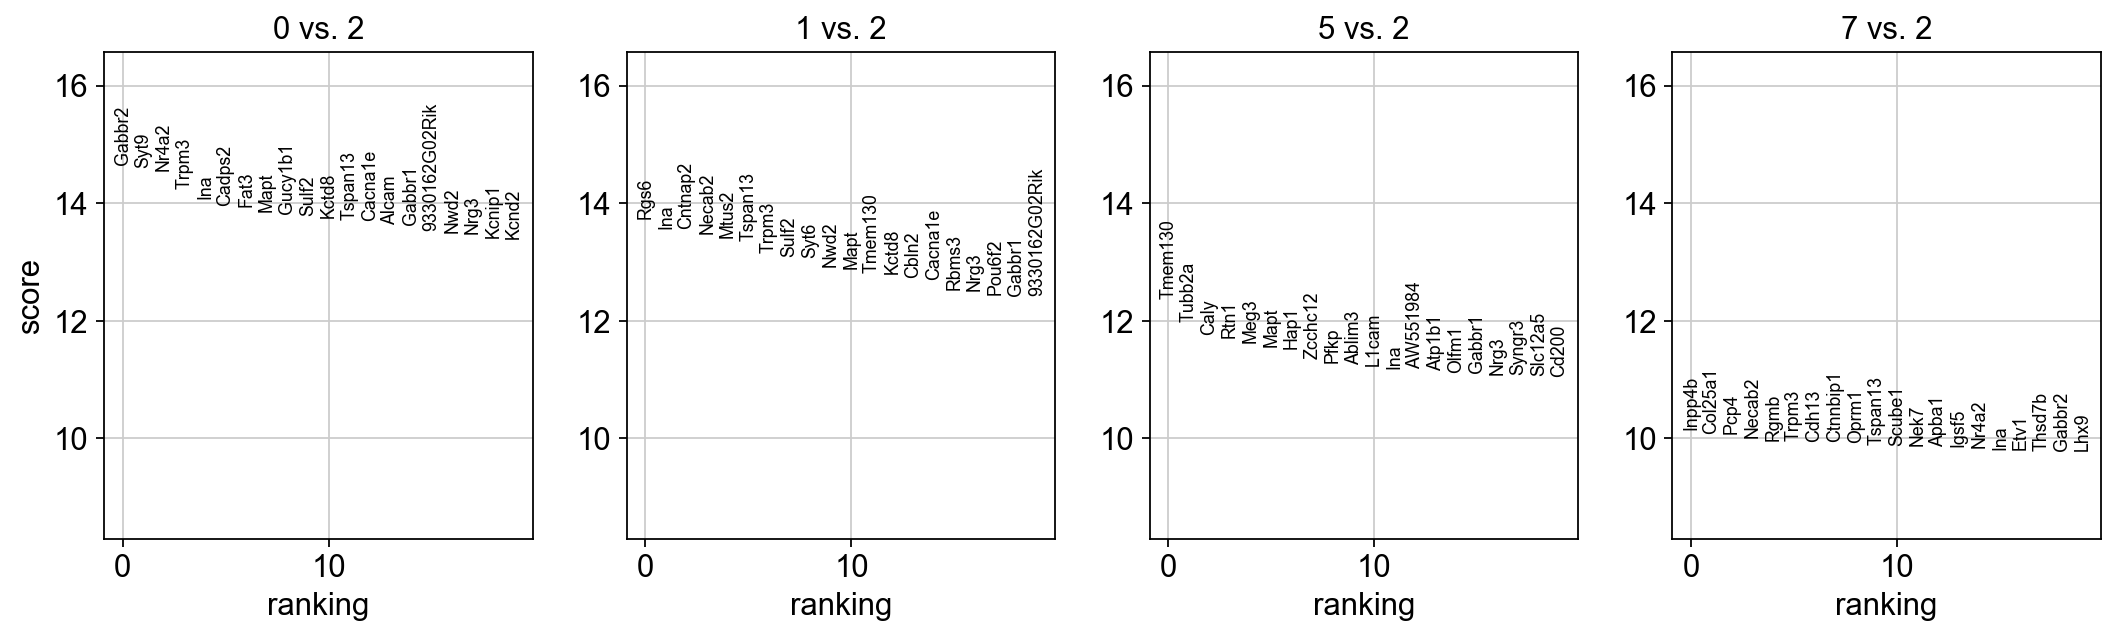

In [82]:
sc.tl.rank_genes_groups(adata, 'louvain', groups=['0', '1', '5', '7'], reference='2', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0', '1', '5', '7'], n_genes=20)

If you want to compare a certain gene across groups, use the following.

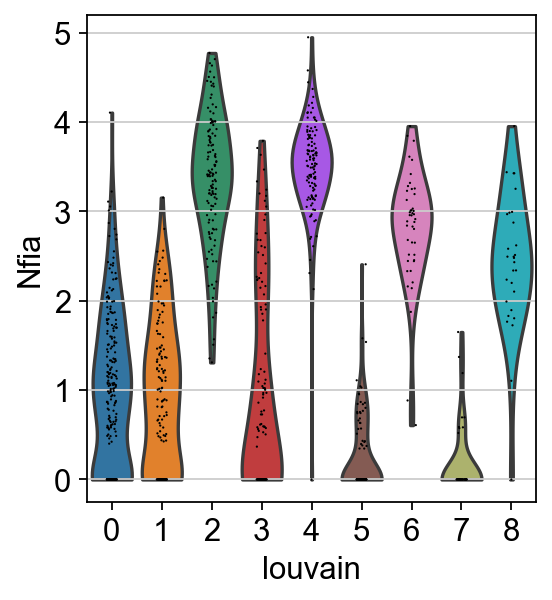

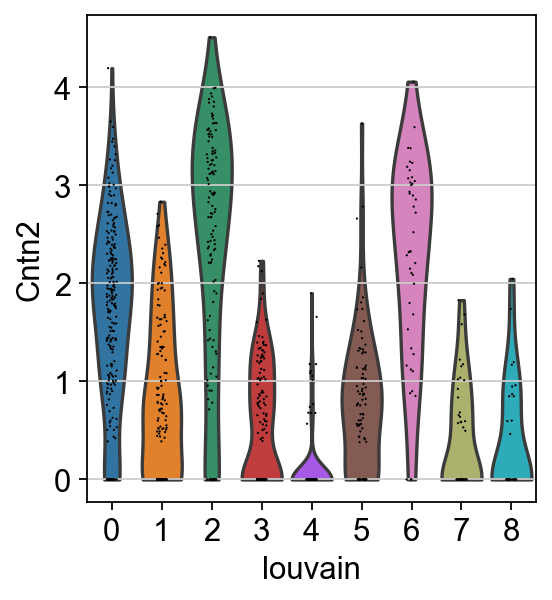

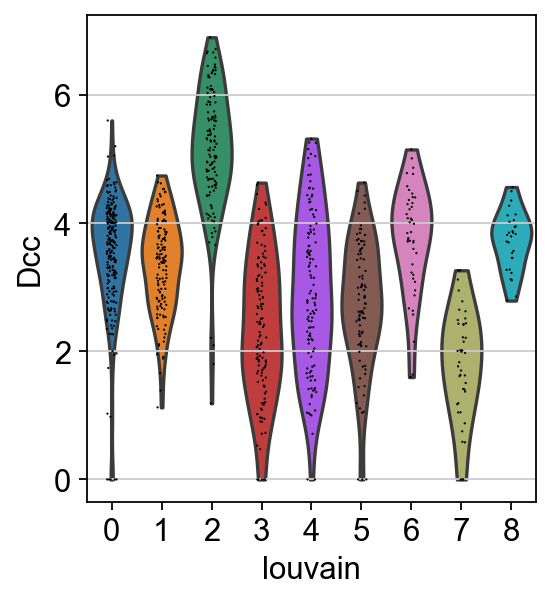

In [9]:
sc.pl.violin(adata, ['Nfia'], groupby='louvain')
sc.pl.violin(adata, ['Cntn2'], groupby='louvain')
sc.pl.violin(adata, ['Dcc'], groupby='louvain')

## Find difference between left and right E18 habenula cells

#first take out only habenula cells by selecting for cells that express Pou4f1, create new adata

In [4]:
habenula = adata[adata[: , 'Pou4f1'].X > 0.1, :] ## 525 cells remain 

In [5]:
habenula

View of AnnData object with n_obs × n_vars = 525 × 5006
    obs: 'ERCC_genes', 'n_counts_withERCCmito', 'n_genes', 'n_counts_with_mito', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_coding', 'percent_lincRNA', 'sum_lincRNA', 'percent_antisense', 'sum_antisense', 'percent_miRNA', 'sum_miRNA', 'percent_bidirectional_promoter_lncRNA', 'sum_bidirectional_promoter_lncRNA', 'percent_snoRNA', 'plate', 'stage', 'group', 'well_no', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts_norm', 'umap_density_plate', 'louvain', 'velocity_clusters', 'lineages', 'root_cells', 'end_points', 'velocity_pseudotime'
    var: 'fullname', 'ENS_names', 'geneid', 'feature', 'chr', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'd

In [18]:
sc.tl.rank_genes_groups(habenula, 'group', groups=['left'], reference='right', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


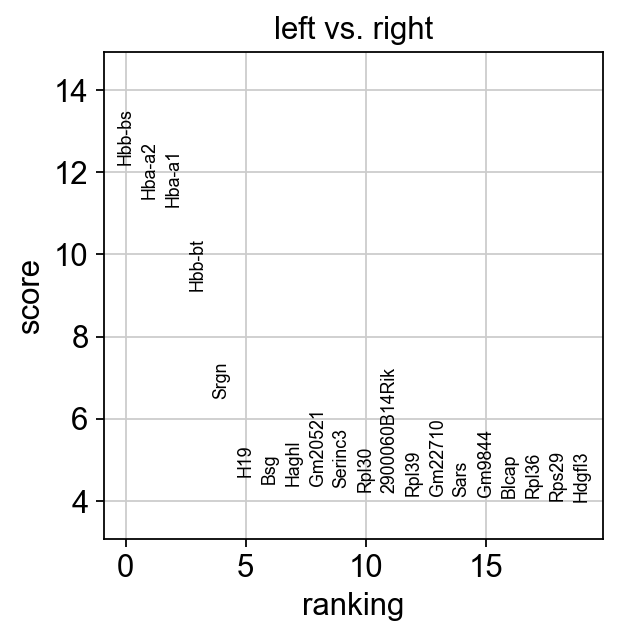

In [20]:
sc.tl.rank_genes_groups(habenula, 'group', groups=['left'], reference='right', method='wilcoxon')
sc.pl.rank_genes_groups(habenula, n_genes=20, save = 'E18-WT_left_vs_right.pdf')

In [11]:
sc.tl.rank_genes_groups(habenula, 'group', groups=['right'], reference='left', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


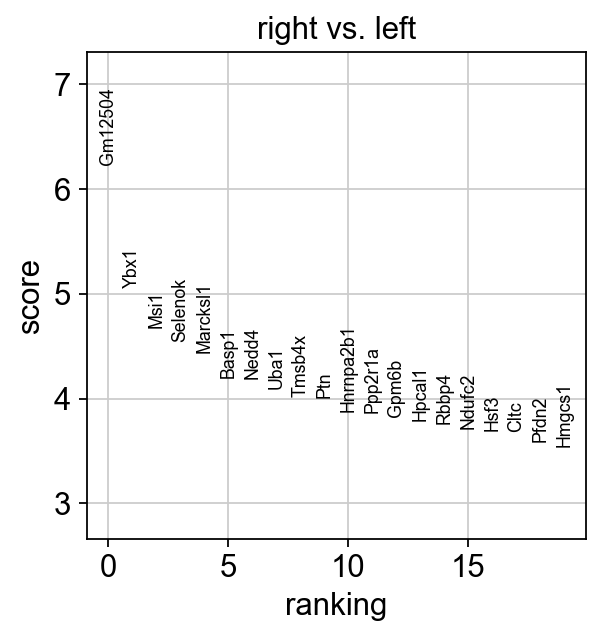

In [21]:
sc.tl.rank_genes_groups(habenula, 'group', groups=['right'], reference='left', method='wilcoxon')
sc.pl.rank_genes_groups(habenula, n_genes=20, save = 'E18-WT_right_vs_left.pdf')

In [19]:
result = habenula.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

left_n        left_p
0  Hbb-bs  3.668145e-34
1  Hba-a2  7.013372e-30
2  Hba-a1  6.693716e-29
3  Hbb-bt  9.066598e-20
4    Srgn  8.963700e-11

In [20]:
dedf = sc.get.rank_genes_groups_df(habenula, group="left")

In [21]:
dedf

scores    names  logfoldchanges         pvals     pvals_adj
0   12.186506   Hbb-bs        1.741167  3.668145e-34  1.035774e-29
1   11.354883   Hba-a2        1.798283  7.013372e-30  9.901829e-26
2   11.155998   Hba-a1        1.615992  6.693716e-29  6.300348e-25
3    9.099599   Hbb-bt        1.929989  9.066598e-20  6.400338e-16
4    6.483469     Srgn        5.391131  8.963700e-11  5.062160e-07
..        ...      ...             ...           ...           ...
95   3.121733   B3gat1        0.410332  1.797901e-03  4.195648e-01
96   3.115019    Lsamp        0.362272  1.839329e-03  4.257142e-01
97   3.102432   Zbtb8b        1.225236  1.919379e-03  4.370766e-01
98   3.089424    Usp29        0.442245  2.005447e-03  4.528658e-01
99   3.084809  Fam110b        0.729203  2.036829e-03  4.528658e-01

[100 rows x 5 columns]

In [22]:
pd.DataFrame(dedf).to_csv(
     './data/output/Jun2021_E18Hb-WT_rank_genes_left.csv')

## Figures

In [44]:
adata = sc.read('./data/output/April2020_E18Hb-WT_quality_filtered_clustered_velo.h5ad')

In [4]:
sc.tl.rank_genes_groups(adata, groupby='louvain', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)


In [5]:
sc.tl.filter_rank_genes_groups(adata,
                               min_in_group_fraction=0.5,
                               max_out_group_fraction=0.3,
                               min_fold_change=1.5)

Filtering genes using: min_in_group_fraction: 0.5 min_fold_change: 1.5, max_out_group_fraction: 0.3


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain']`


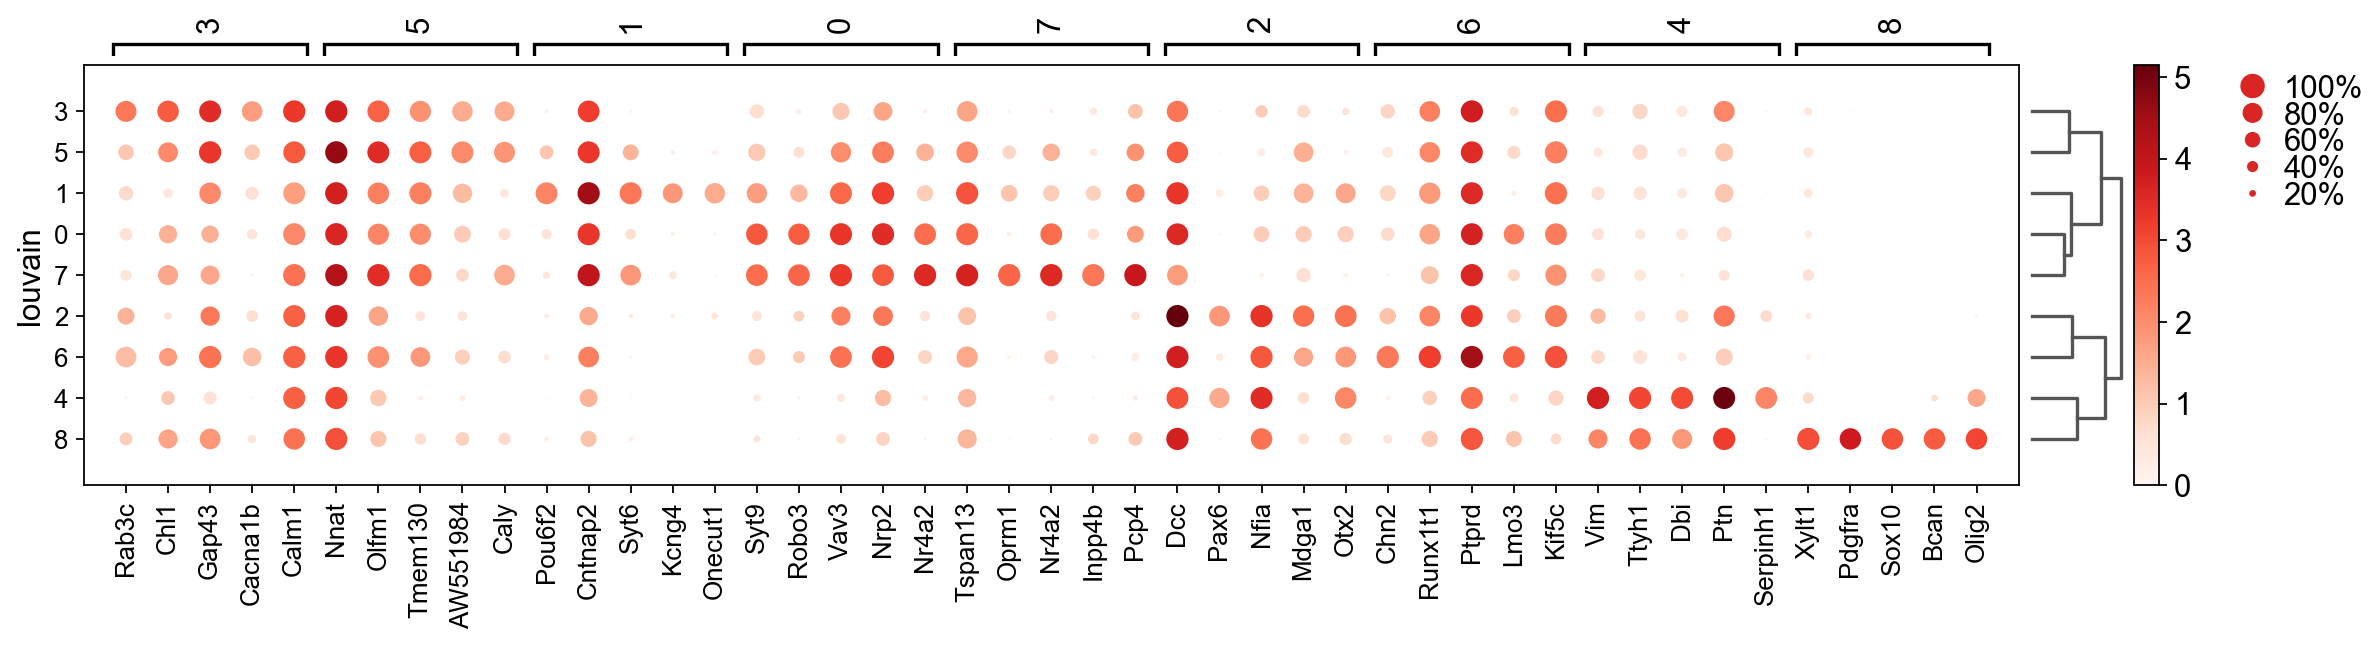

In [6]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, var_group_rotation=90)

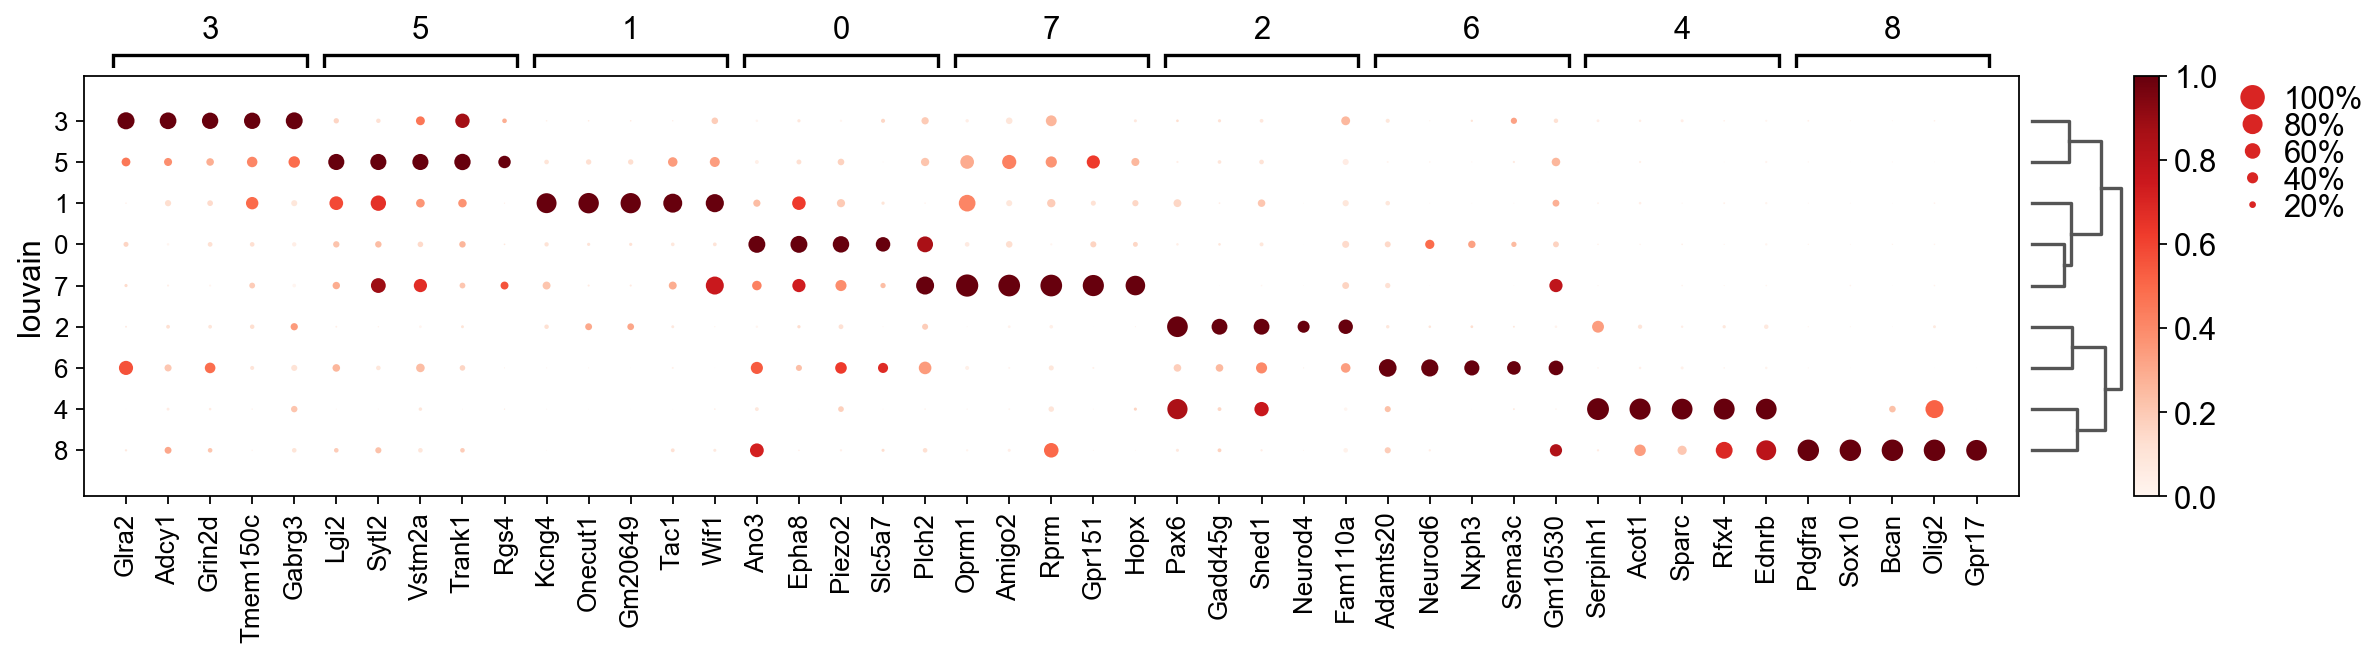

In [7]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes= 5, key='rank_genes_groups_filtered', standard_scale='var', groupby = "louvain")

## ISH markers

In [11]:
marker_genes_2 = ['Gbx2', 'Gpr151', 'Kcng4', 'Oprm1', 'Pax6', 'Sema3c', 'Sparc', 'Pdgfra']

saving figure to file ./figures/umap_clusters_markers_UMAP.pdf


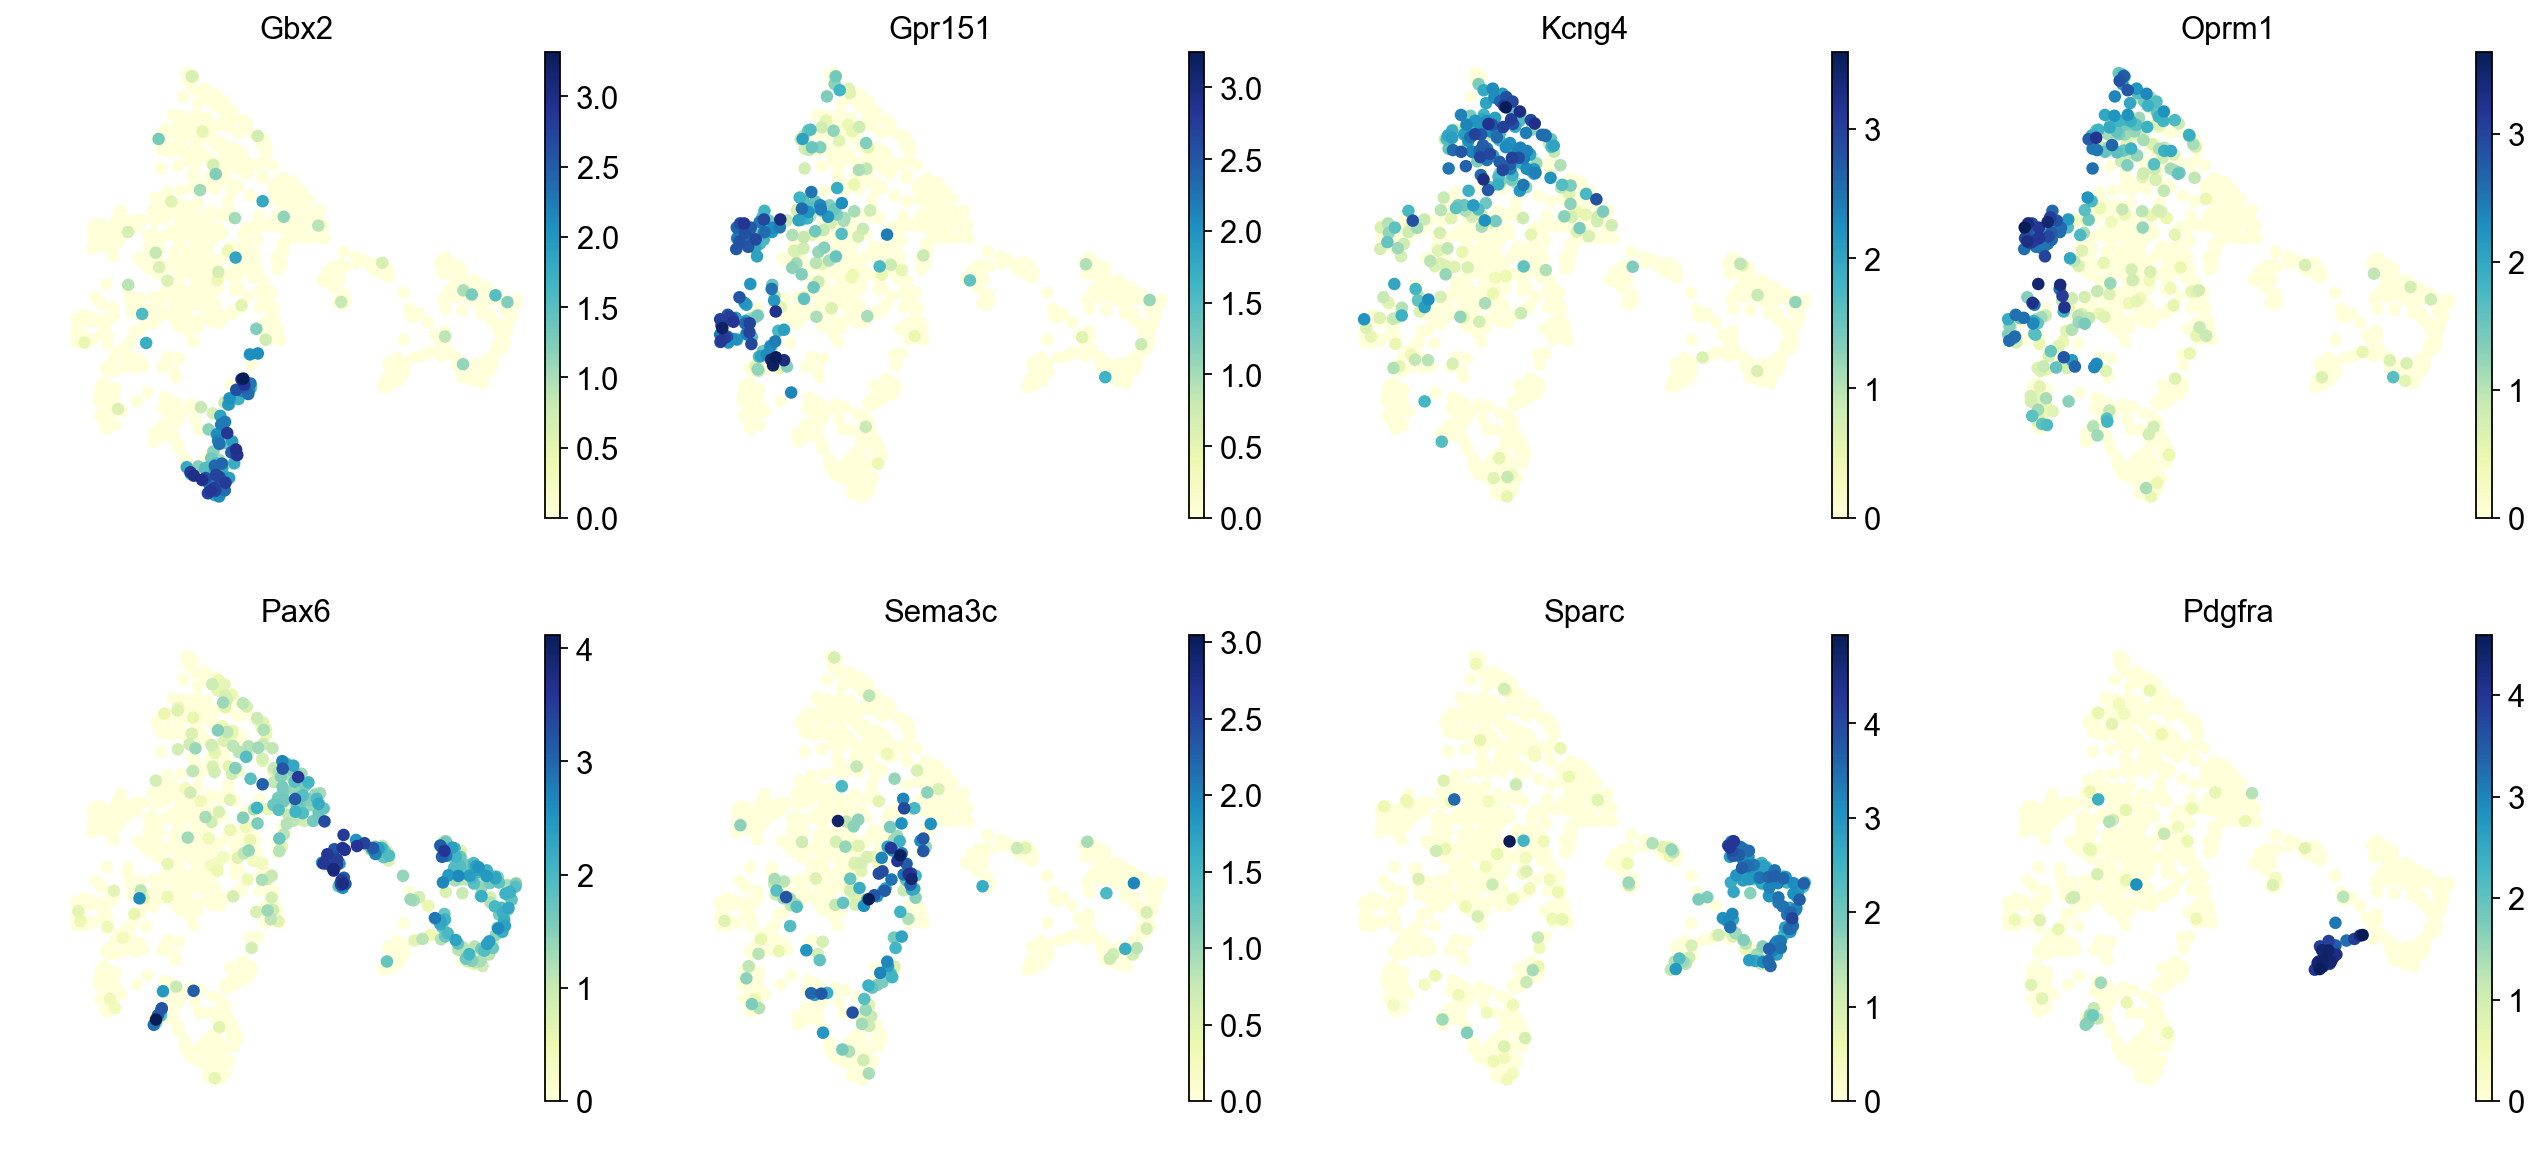

In [15]:
sc.pl.umap(adata, color= marker_genes_2, use_raw=True, frameon=False, color_map = "YlGnBu", save = "UMAP_markers_1.pdf")

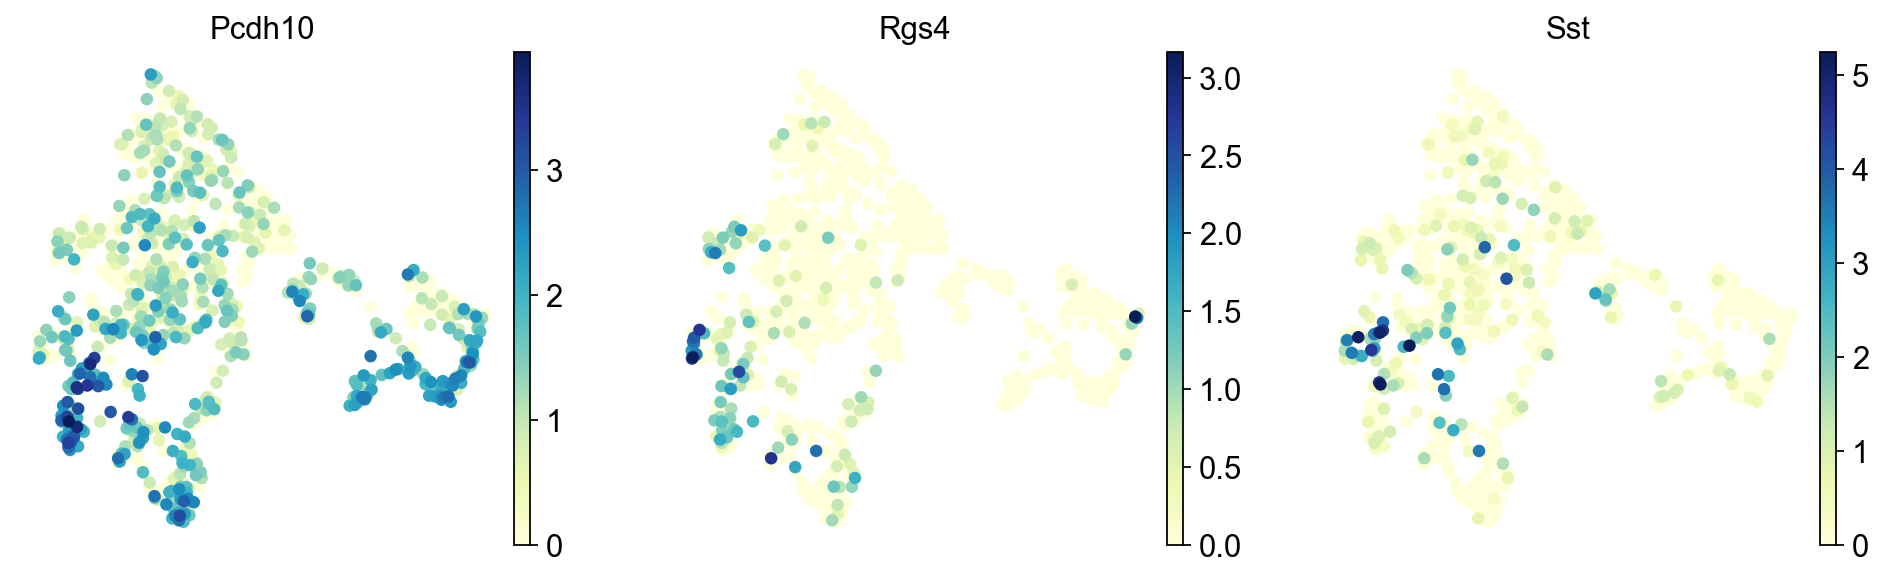

In [5]:
sc.pl.umap(adata, color= ['Pcdh10', 'Rgs4', 'Sst'], use_raw=True, frameon=False, color_map = "YlGnBu", 
           save = "UMAP_markers_2.pdf")

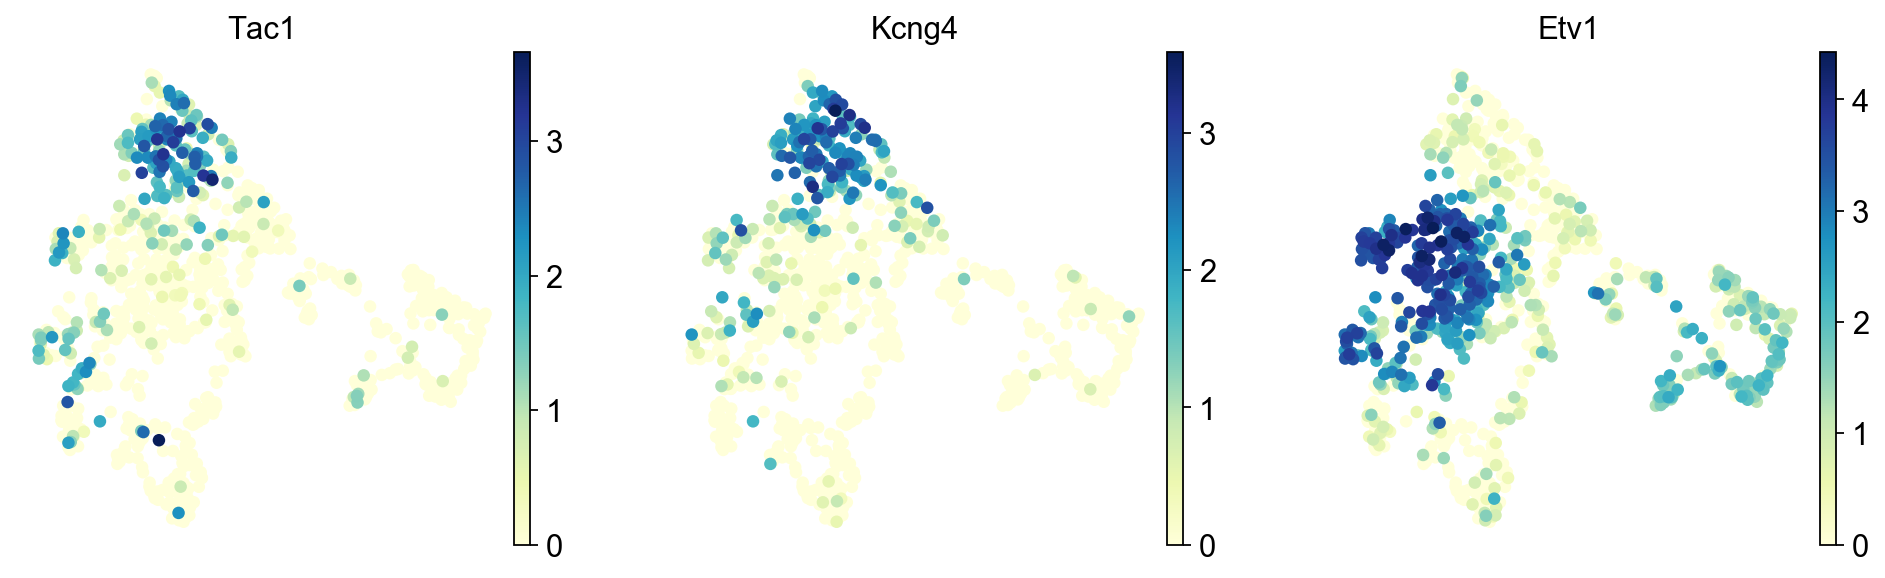

In [4]:
sc.pl.umap(adata, color=['Tac1', 'Kcng4', 'Etv1'], use_raw=True, frameon=False, color_map = "YlGnBu")

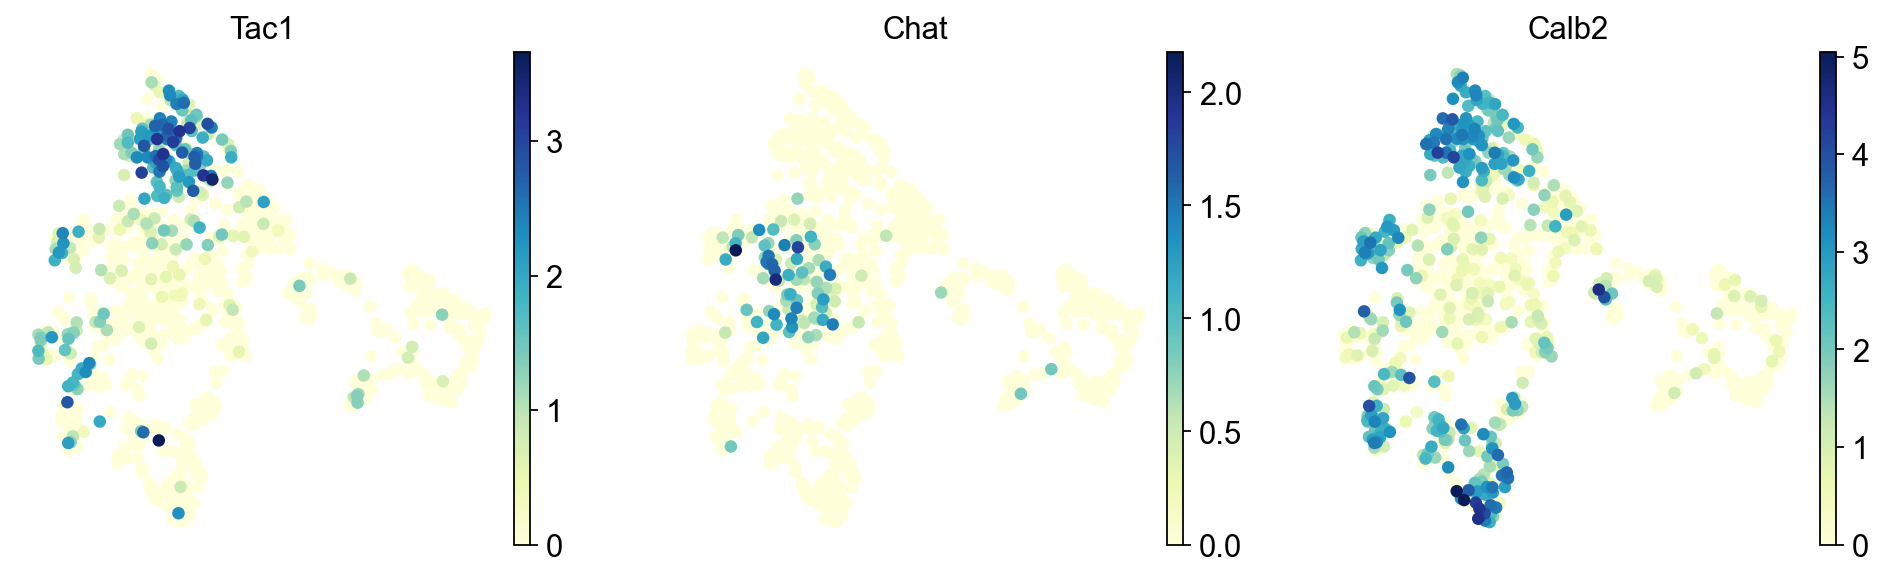

In [6]:
sc.pl.umap(adata, color=['Tac1', 'Chat', 'Calb2'], use_raw=True, frameon=False, color_map = "YlGnBu")

## Highlight a single cluster

In [4]:
adata = sc.read('./data/output/April2020_E18Hb-WT_quality_filtered_clustered_velo.h5ad')

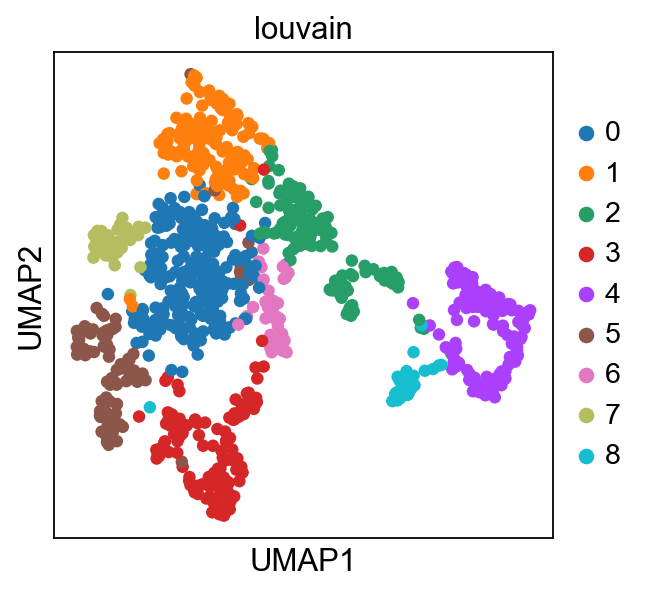

In [4]:
sc.pl.umap(adata, color=['louvain'])

In [5]:
adata.uns["louvain_colors"]

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94'], dtype=object)

In [10]:
adata.uns["louvain_colors"] = ["#c0c0c0", '#c0c0c0', "#279e68", "#c0c0c0", "#c0c0c0", 
                               "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0"]

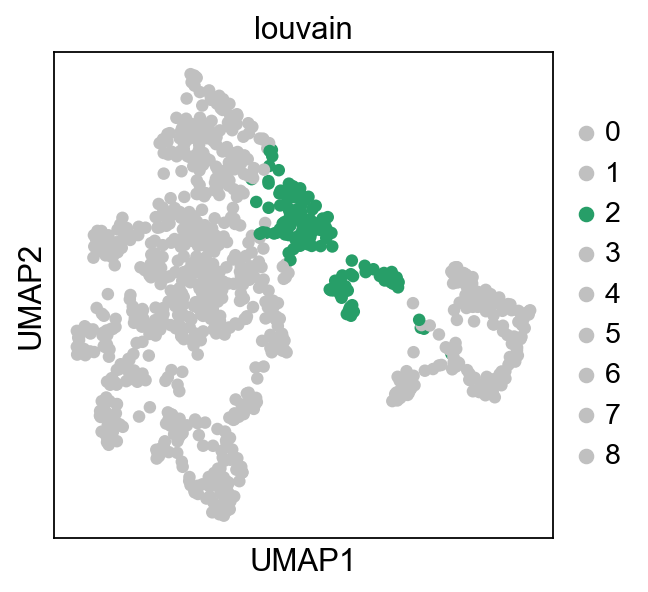

In [12]:
sc.pl.umap(adata, color=['louvain'], save = "NPC_UMAP.pdf")

In [15]:
adata.uns["louvain_colors"] = ["#c0c0c0", '#ff7f0e', "#c0c0c0", "#c0c0c0", "#c0c0c0", 
                               "#c0c0c0", "#c0c0c0", "#c0c0c0", "#c0c0c0"]

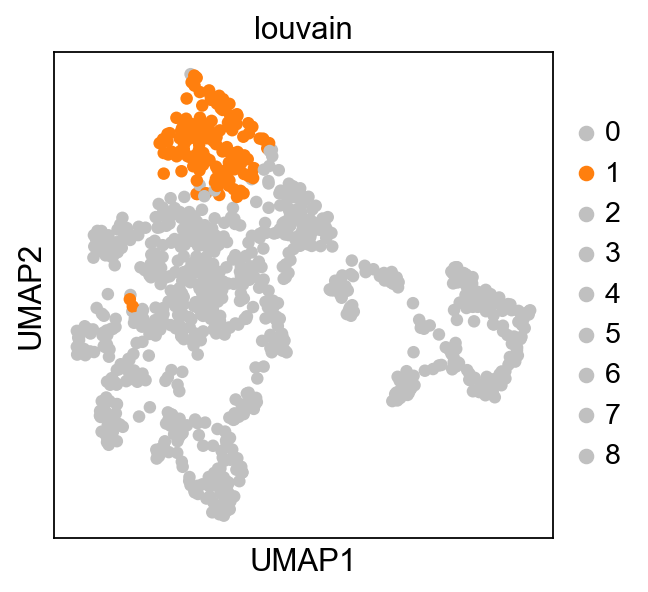

In [16]:
sc.pl.umap(adata, color=['louvain'], save = "Hb2_UMAP.pdf")

In [19]:
adata.uns["louvain_colors"] = ["#1f77b4", '#c0c0c0', "#c0c0c0", "#c0c0c0", "#c0c0c0", 
                               "#c0c0c0", "#c0c0c0", "#b5bd61", "#c0c0c0"]

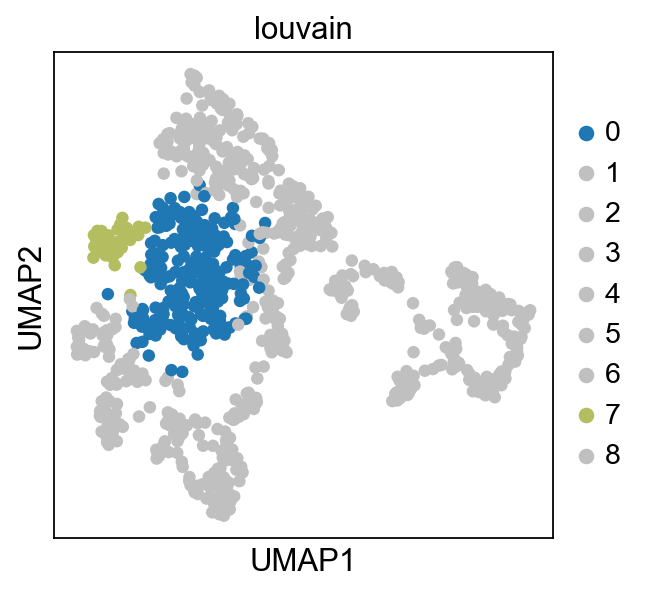

In [20]:
sc.pl.umap(adata, color=['louvain'], save = "Hb1_Hb4_UMAP.pdf")

In [21]:
adata.uns["louvain_colors"] = ["#c0c0c0", '#c0c0c0', "#c0c0c0", "#c0c0c0", "#c0c0c0", 
                               "#8c564b", "#c0c0c0", "#c0c0c0", "#c0c0c0"]

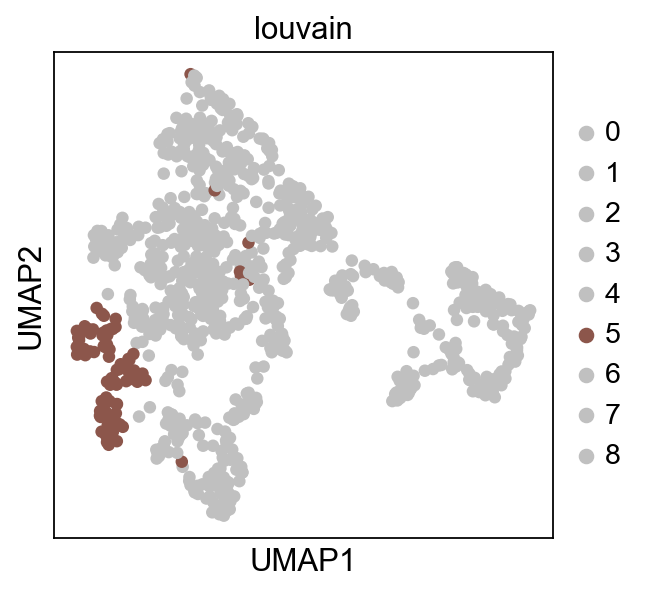

In [22]:
sc.pl.umap(adata, color=['louvain'], save = "Hb5_UMAP.pdf")

## Thalamic subset

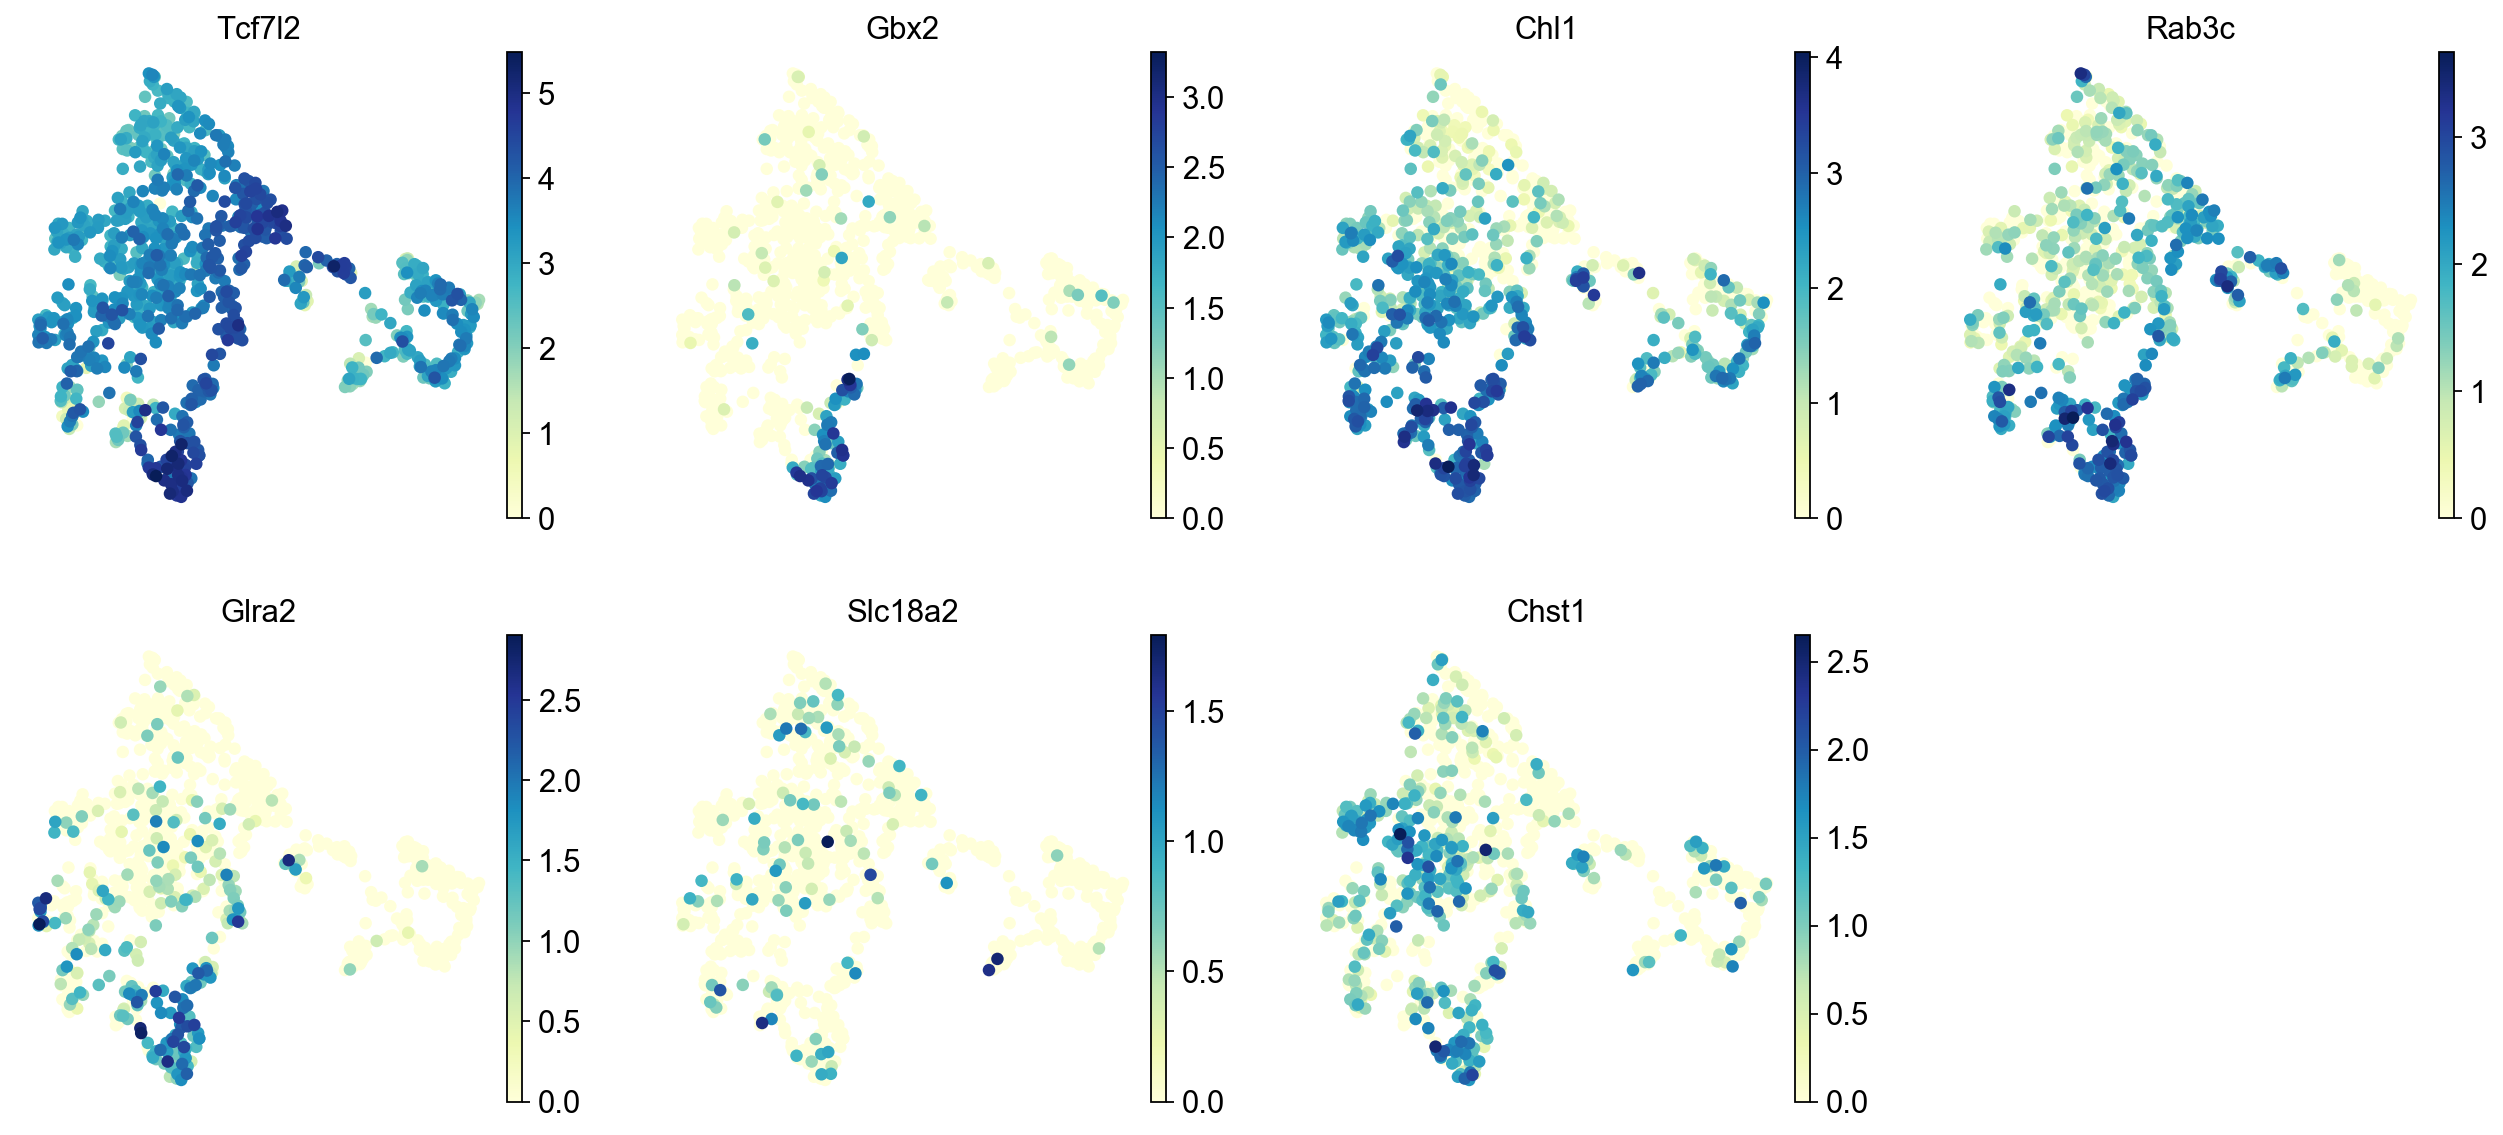

In [17]:
sc.pl.umap(adata, color=['Tcf7l2','Gbx2', 'Chl1', 'Rab3c', 'Glra2', 'Slc18a2', 'Chst1'], use_raw=True, frameon=False, color_map = "YlGnBu", 
           save = "thalamus_discussion.pdf")

## Export to create Seurat object

In [ ]:
adata_raw.obs.to_csv("./data/output/E18WT_metadata.csv")
adata_raw.X.to_csv("./data/output/E18WT_rawexpr.csv")

In [4]:
adata.X

NameError: name 'adata_raw' is not defined

In [28]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt


In [32]:
adata.obs.group

index
Habenula_001___L1__left_9     left
Habenula_001___L1__left_10    left
Habenula_001___L1__left_12    left
Habenula_001___L1__left_14    left
Habenula_001___L1__left_15    left
                              ... 
Habenula_005___LR__mix_377     mix
Habenula_005___LR__mix_378     mix
Habenula_005___LR__mix_379     mix
Habenula_005___LR__mix_380     mix
Habenula_005___LR__mix_381     mix
Name: group, Length: 948, dtype: category
Categories (3, object): [left, mix, right]

In [33]:
#calculate percentages of sampling time points for each Louvain cluster
df = pd.DataFrame()
for x in range(0, len(set(adata.obs["louvain"]))):
    temp = adata[adata.obs["louvain"] == str(x)]
    left = temp[temp.obs["group"] == "left"].shape[0]
    right = temp[temp.obs["group"] == "right"].shape[0]
    mix = temp[temp.obs["group"] == "mix"].shape[0]
    all_tp = left+right+mix
    perc_left = (left/(all_tp))*100
    perc_right = (right/(all_tp))*100
    perc_mix = (mix/(all_tp))*100
    df[str(x)] = [perc_left, perc_right, perc_mix]

df.index = ["left", "right", "mix"]
df.columns = ['0', '1','2', '3', '4', '5','6', '7', 
              '8']

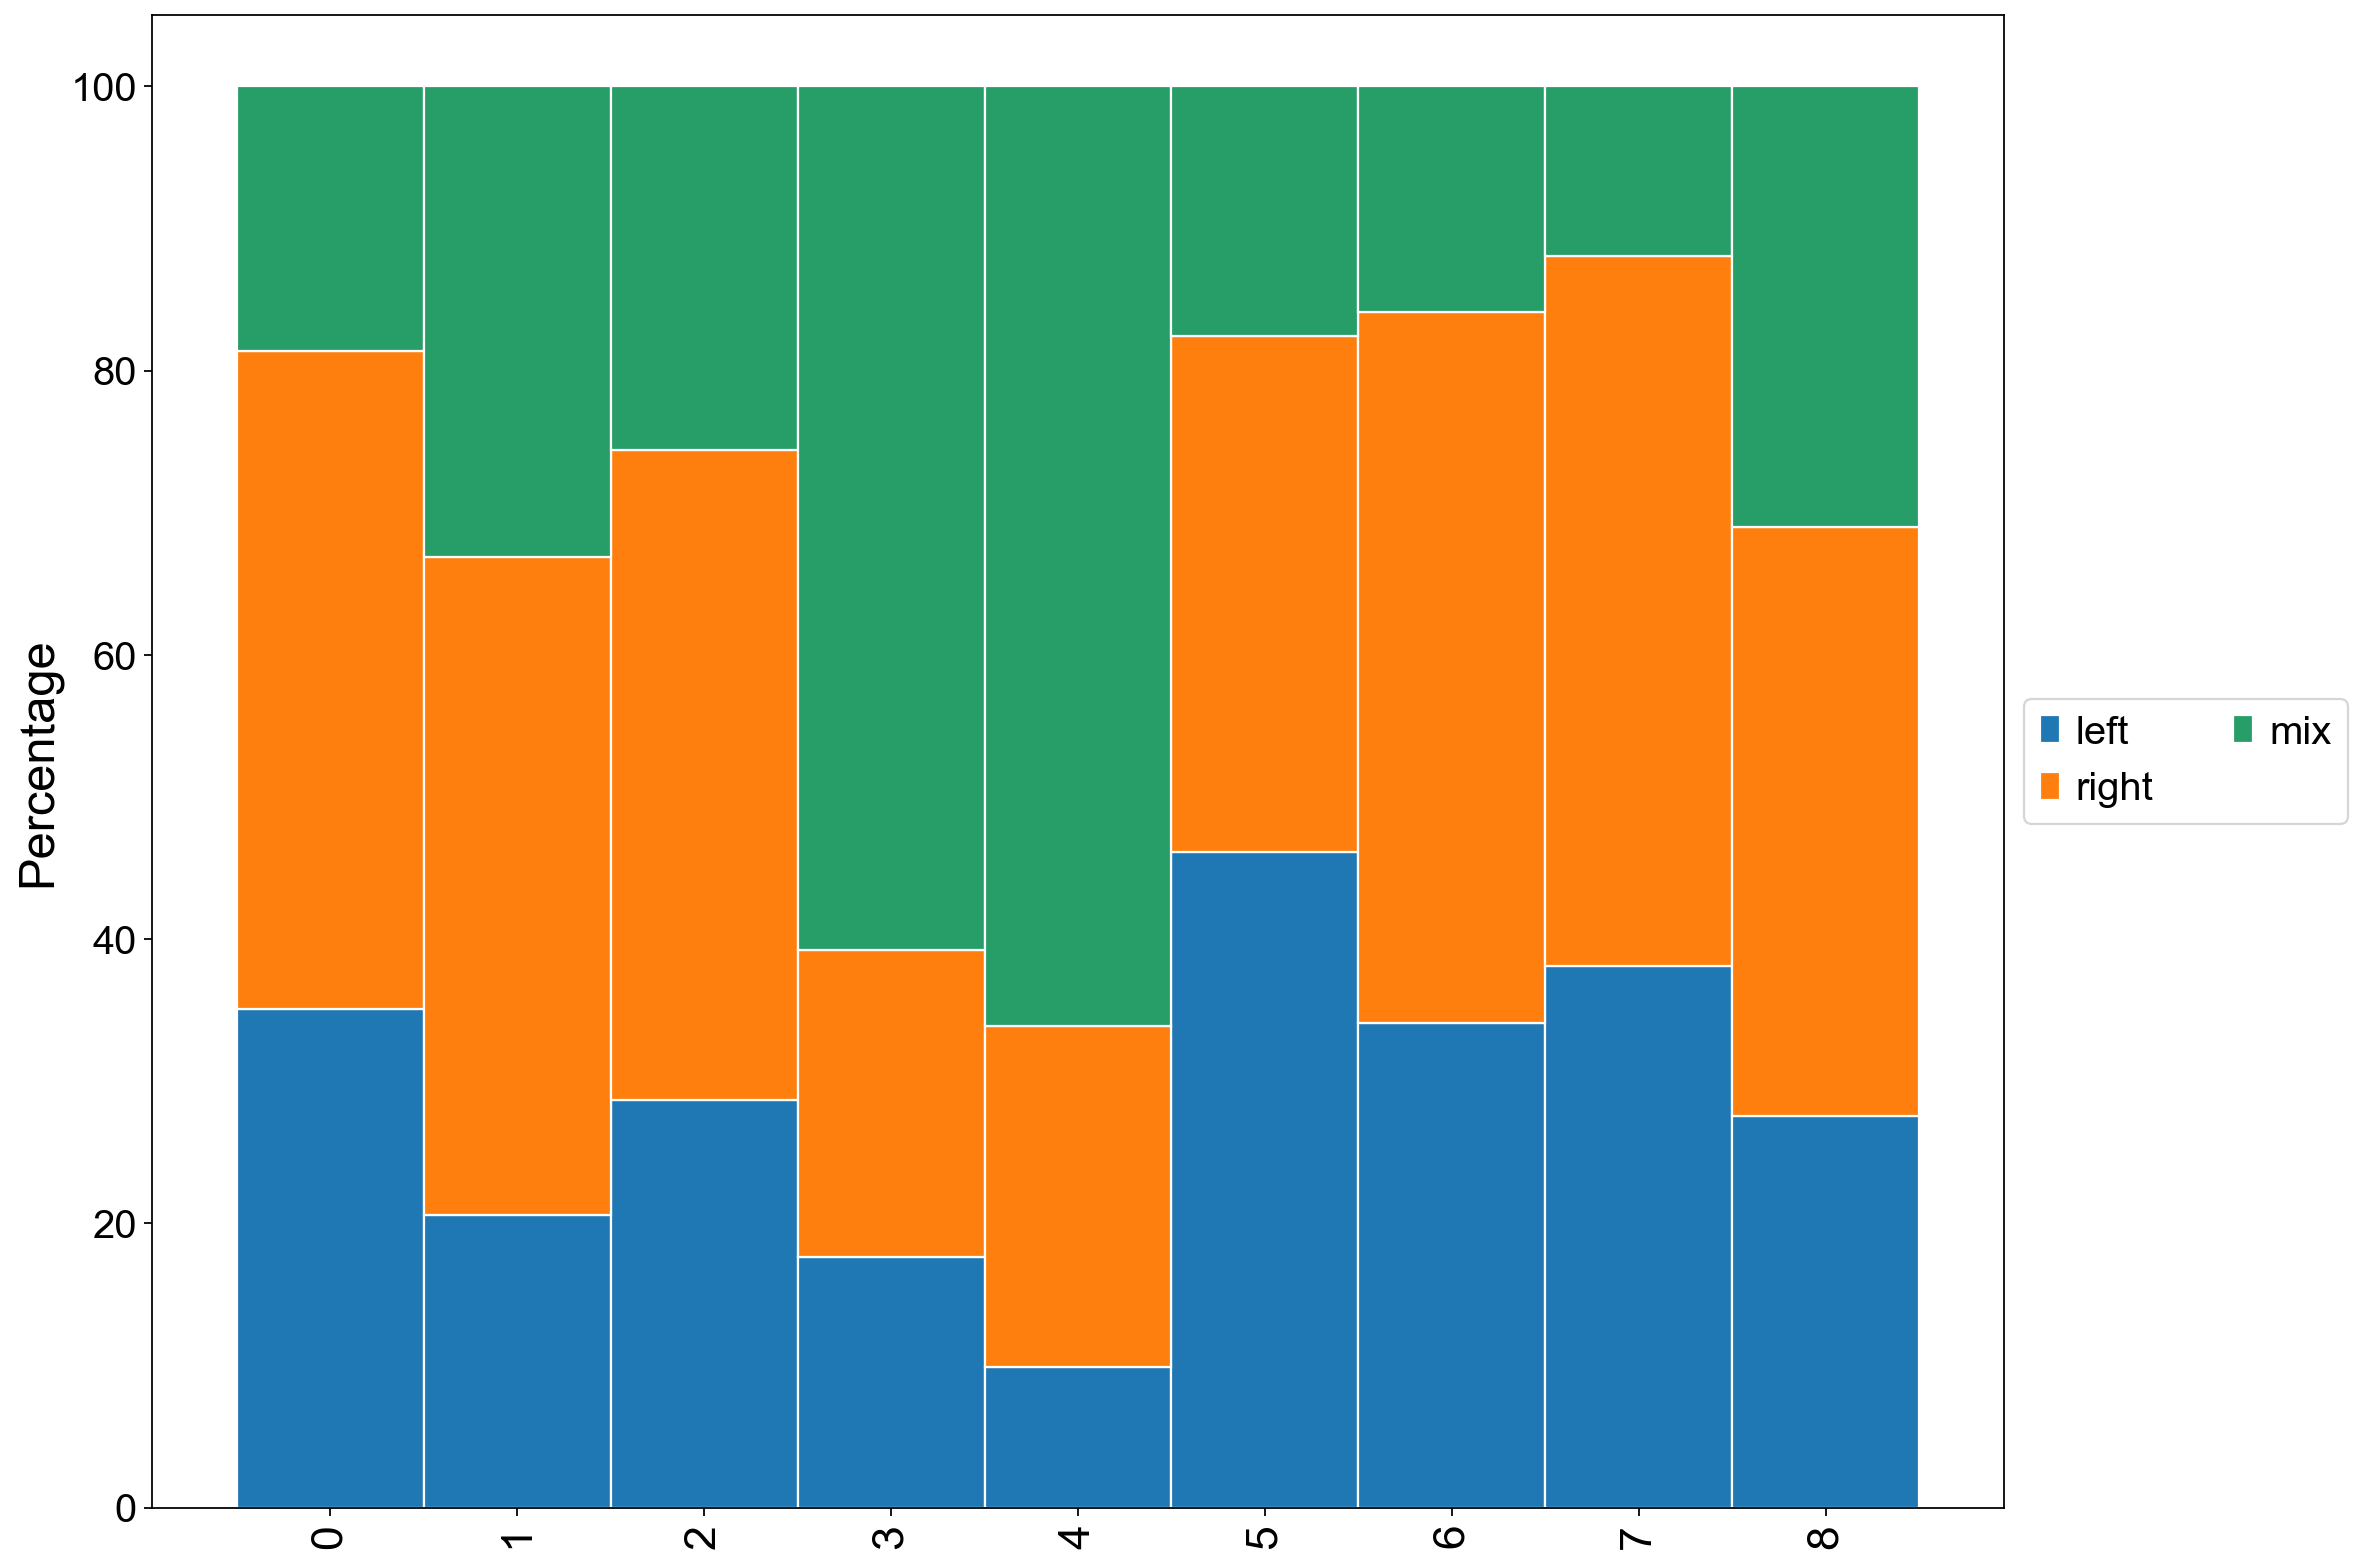

In [34]:
#create stacked percentage bar plot with matplotlib
plt.figure(figsize=(15, 10))
een = plt.bar(df.columns, df.loc["left"], edgecolor="white", width=1)
twee = plt.bar(df.columns, df.loc["right"], bottom=df.loc["left"], edgecolor="white", width=1)
drie = plt.bar(df.columns, df.loc["mix"], bottom=[i+j for i,j in zip(df.loc["left"], df.loc["right"])], edgecolor="white", width=1)
plt.legend((een[0], twee[0], drie[0]), 
           ('left', 'right', 'mix'), loc="center left", fontsize=18,ncol=2, bbox_to_anchor=(1,0.5))
plt.xticks(rotation=90, size=20)
plt.yticks(size=18)
plt.ylabel("Percentage", size=22)
plt.grid(False)
plt.tight_layout()
plt.savefig("occupancy_leftvsright.pdf")
plt.show()

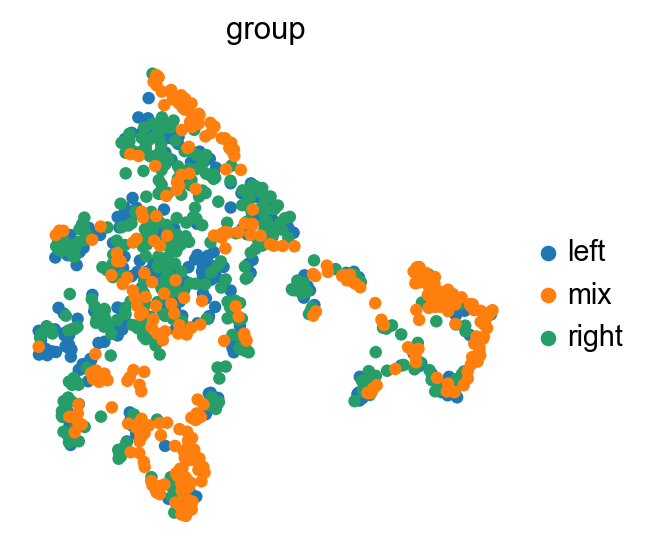

In [4]:
sc.pl.umap(adata, color='group', frameon=False,
           save = "Left_vs_right.pdf")